# <center> ★ Data Analysis Project for Walmart Sales ★

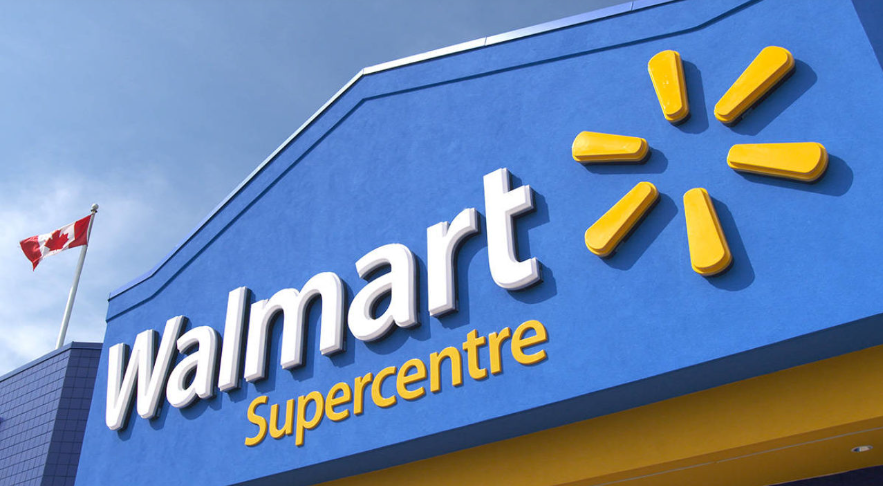

In [1]:
from IPython import display
display.Image("WalmatSales Photo.PNG")

## Objectives:
* 1 Importing the Libraries
* 2 Loading of Dataset
* 3 Understanding the Dataset
* 4 Exploratory Data Analysis
* 5 Data Cleaning 
* 6 Data Analysis and Visualization
* ** 7 Data Preprocessing 
* ** 8 Build Regression models to predict the sales w.r.t single & multiple features.
* ** 9 Evaluate the models & compare their respective scores like R2, RMSE, etc* 


## 1. importing the Libraries


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
#from ydata_profiling import ProfileReport

#import plotly.express as px ---- optional used to visualized most categorical features
#setting the column width
pd.set_option('display.max_column', None)

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Loading  of Dataset

In [3]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 3. Understanding the Dataset

### About Dataset


#### Description:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.



#### About the features

Add Suggestion
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index (its the sum of price changes over a period of time for a particular commodity)
* Unemployment - Prevailing unemployment rate
* Holiday Events<br /> 1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> 2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> 3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> 4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


### Acknowledgements
The dataset is taken from Kaggle.
* dataset link: https://www.kaggle.com/datasets/yasserh/walmart-dataset

## 4. Exploratory Data Analysis

In [4]:
# viewing the first 10 rows
df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
#knowing the shape of the dataset
df.shape

(6435, 8)

In [6]:
# the Descriptive statistics of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [10]:
df.Store.unique() #number of stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [11]:
df.Holiday_Flag.unique() #Holidays (1) non-Holidays (0)

array([0, 1], dtype=int64)

## 5. Data Cleaning 

In [12]:
# checking for duplicates
df.duplicated().sum()

0

In [13]:
# checking for null values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

* Inference:
  1. The dataset contains 6435 rows and 8 columns
  2. The Unemployment and Temperature columns might contain some outliers
  3. The dataset contains 2 categorical columns and 5 numeric columns and 1 object (date)
  4. We have 45 walmat stores
  4. The dataset has no null value
  4. The dataset does not have any duplicates
  5. Almost all of the dataset are float64 numbers, just two int64 and one object which is the date
  

## 6. Analysis and Visualization

#### 1. <b>Lets check the year that has the highest Average sales on the saleday</b>

- it was observed that the walmat dataset is only for <code>Fridays</code> sales.
* To get the above insight, we need to extract the weekday from the date column in the dataset.
* We must first of all convert the date column to a datetime dtype.



In [14]:
# the date column should be parsed and ensure that its in the right format
df['Parsed_Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [15]:
#standardizing the column name, removing every unwanted whitespace
df.columns = [col.strip() for col in df.columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   object        
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Parsed_Date   6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 452.6+ KB


In [17]:
#droping the initial Date column and renaming the Parsed_Date column
df.drop(['Date'], inplace=True, axis=1)


In [18]:
df.rename(columns={'Parsed_Date':'Date'}, inplace=True)

In [19]:
# extracting the weekday, the month, and the year from the date column
df['Weekday'] = df.Date.dt.day_name()
df['Weekday_No'] = df.Date.dt.dayofweek
df['Month'] = df.Date.dt.month_name()
df['Month_No'] = df.Date.dt.month
df['Year'] = df.Date.dt.year


In [20]:
df.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date,Weekday,Weekday_No,Month,Month_No,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,Friday,4,February,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Friday,4,February,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,Friday,4,February,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,Friday,4,February,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,Friday,4,March,3,2010


* From the above, the day name and month name was also extracted to get more insight during the analysis but will be later dropped when doing the prediction.

In [21]:
df.Weekday.unique()

array(['Friday'], dtype=object)

In [22]:
#knowing the weekdays that has the highest sales

In [23]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date,Weekday,Weekday_No,Month,Month_No,Year
0,1,1643690.9,0,42.31,2.572,211.096358,8.106,2010-02-05,Friday,4,February,2,2010


In [24]:
df.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Date             143
Weekday            1
Weekday_No         1
Month             12
Month_No          12
Year               3
dtype: int64

In [25]:
df.groupby('Year')['Weekly_Sales'].count()

Year
2010    2160
2011    2340
2012    1935
Name: Weekly_Sales, dtype: int64

* From the above we noticed that the different Year has different number of sales

In [26]:
highest_sale = df.groupby('Year')['Weekly_Sales'].mean().reset_index()
highest_sale

,Year,Weekly_Sales
0,2010,1.059670e+06
1,2011,1.046239e+06
2,2012,1.033660e+06


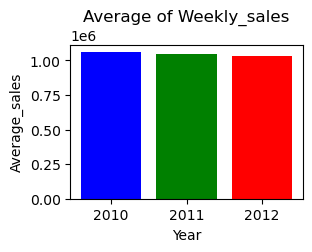

In [27]:
plt.figure(figsize=(3,2))
plt.bar(highest_sale['Year'], highest_sale['Weekly_Sales'], color=['blue','green','red'])
plt.xlabel('Year')
plt.ylabel('Average_sales')
plt.title('Average of Weekly_sales')
plt.show()


* the 2010 has the Highest weekly_sales of <code>$1,059,670</code> in the dataset

In [28]:
#We can still go forward and determine which store made the highest average sales in 2010


*we can also check for other insights:
    1. Highest Total Monthly Weekly_Sales across the dataset
    2. Highest Total yearly Monthly_Sales across the dataset
    3. Highest Monthly Weekly_Sales in all the store
    4. Highest yearly Monthly_Sales in all the store

In [97]:
#Total Monthly Weekly_sales across the dataset
df.groupby('Store')['Weekly_Sales'].count().reset_index().sort_values(by='Weekly_Sales', ascending=False)

,Store,Weekly_Sales
0,1,143
23,24,143
25,26,143
26,27,143
27,28,143
28,29,143
29,30,143
30,31,143
31,32,143
32,33,143


* it was observed that every store has total number of weekly sales count, now lets check if they all have total number of monthly sales

In [98]:
#Total Monthly Weekly_sales across the dataset
df.groupby(['Store','Month'])['Weekly_Sales'].count().reset_index().sort_values(by='Weekly_Sales', ascending=False)

,Store,Month,Weekly_Sales
0,1,April,14
65,6,July,14
341,29,July,14
137,12,July,14
348,30,April,14
...,...,...,...
100,9,January,8
393,33,November,8
105,9,November,8
388,33,January,8


* since the above sales count for month is not the same so we wil be using the average function not sum anymore

* we now have:
    1. Highest Average Monthly Weekly_Sales across the dataset
    2. Highest Average Weekly_Sales in all the store
    3. Highest Average yearly Weekly_Sales in all the store
   

In [99]:
# 1. Highest Average Monthly Weekly_sales across the dataset
df.groupby('Month')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)

,Month,Weekly_Sales
2,December,1.281864e+06
9,November,1.147266e+06
6,June,1.064325e+06
3,February,1.053200e+06
1,August,1.048017e+06
5,July,1.031748e+06
8,May,1.031714e+06
0,April,1.026762e+06
7,March,1.013309e+06
10,October,9.996321e+05


* December has the highest Average sales of <code>$1,281,864</code> across the dataset

In [112]:
# 2. Highest Average Weekly_Sales in all the stores
df.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


* From the above, store 20 has the Highest Average Weekly_Sales of <code>$2,107,677</code>

In [111]:
#3. Highest Average yearly Weekly_Sales in all the store
# Now lets Drill down to the individual stores
top = df.groupby(['Store','Year'])['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)
bottom = df.groupby(['Store','Year'])['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=True)
bottom

,Store,Year,Weekly_Sales
97,33,2011,2.491892e+05
98,33,2012,2.659430e+05
96,33,2010,2.659757e+05
129,44,2010,2.834900e+05
130,44,2011,2.980422e+05
...,...,...,...
58,20,2011,2.112250e+06
57,20,2010,2.119439e+06
10,4,2011,2.136390e+06
11,4,2012,2.157470e+06


* store 14 has the highest Average sales of <code>$2,197,130 </code> in the year 2010 across the dataset

* store 33 has the list Average sales of <code>$2,491,892</code> in 2011

In [104]:
stores = df.Store.unique()
stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [31]:
grouped_df = df.groupby(['Store','Year'])['Weekly_Sales'].mean().reset_index()

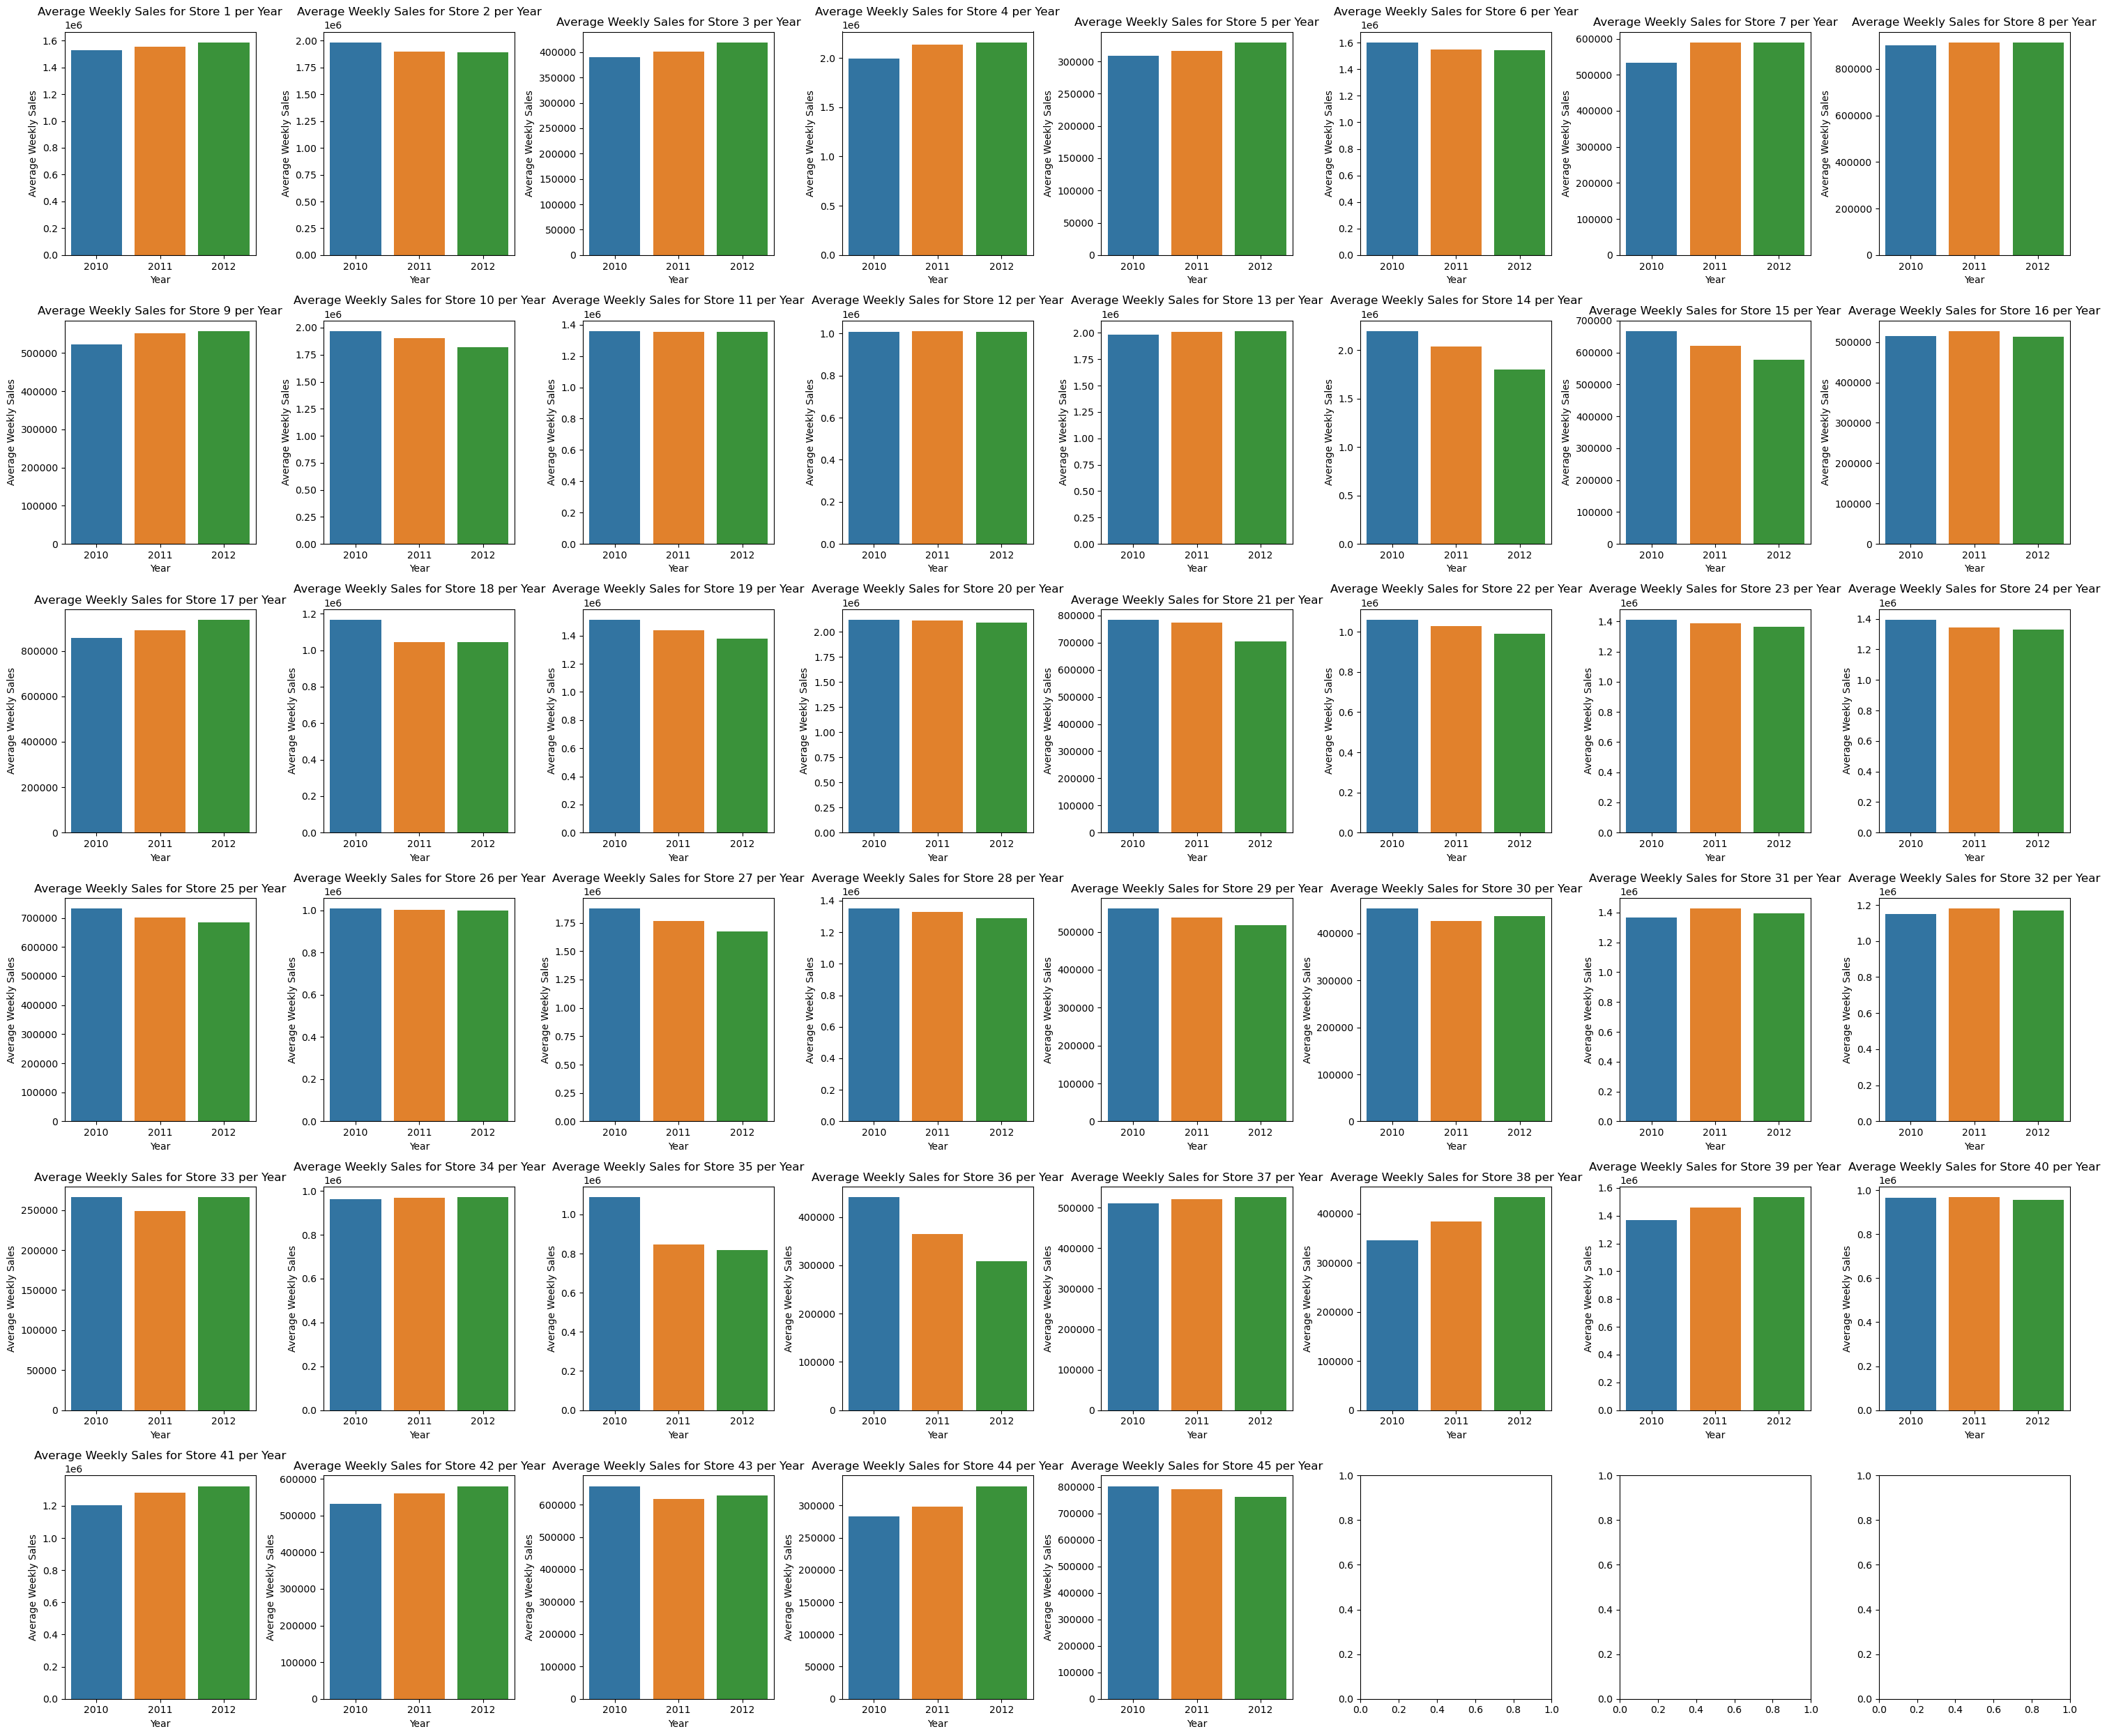

In [32]:
import math
num_stores = 45
num_of_rows = 6
num_of_cols = math.ceil(num_stores/num_of_rows)

fig, axes = plt.subplots(nrows=num_of_rows, ncols=num_of_cols, figsize=(30, 25), squeeze=False)

# Ensure axes is always iterable
axes = axes.flatten()

# Plot each store's data in a separate subplot
for ax, store in zip(axes, stores):
    store_data = grouped_df[grouped_df['Store'] == store]
    sns.barplot(x='Year', y='Weekly_Sales', data=store_data, ax=ax)
    ax.set_title(f'Average Weekly Sales for Store {store} per Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Weekly Sales')

# Adjust layout
plt.tight_layout()
plt.show()


* From the above visualization, it was observered that more than average of the stores made their highest sales in year 2010

#### 2. <b>Comapring the Sales in Holidays and non-Holidays</b>


In [33]:
Holiday_Sales = df.groupby("Holiday_Flag")['Weekly_Sales'].mean().reset_index()
Holiday_Sales

,Holiday_Flag,Weekly_Sales
0,0,1.041256e+06
1,1,1.122888e+06


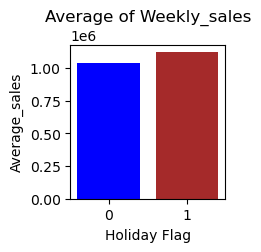

In [34]:
plt.figure(figsize=(2,2))
plt.bar(Holiday_Sales['Holiday_Flag'], Holiday_Sales['Weekly_Sales'], color=['blue','brown'])
plt.xlabel('Holiday Flag')
plt.ylabel('Average_sales')
plt.title('Average of Weekly_sales')
plt.show()

* It was observed that During the Holiday sales, the stores on an average made the best sales than normal days, Holidays sales is 1,122,888 USD while non Holidays sales is 1,041,256 USD


#### 3. <b>Which of the Holidays has the highest sales</b>

In [35]:
# Extracting the Holiday Data
holiday_df = df[df['Holiday_Flag'] == 1]
holiday_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date,Weekday,Weekday_No,Month,Month_No,Year
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Friday,4,February,2,2010
31,1,1507460.69,1,78.69,2.565,211.495190,7.787,2010-09-10,Friday,4,September,9,2010
42,1,1955624.11,1,64.52,2.735,211.748433,7.838,2010-11-26,Friday,4,November,11,2010
47,1,1367320.01,1,48.43,2.943,211.404932,7.838,2010-12-31,Friday,4,December,12,2010
53,1,1649614.93,1,36.39,3.022,212.936705,7.742,2011-02-11,Friday,4,February,2,2011


* creating a function to fix the names of the Holidays with the corresponding date and create a new column
Holiday Events
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [36]:
def hol_event(x):
    if x == '2010-02-12' or x == '2011-02-11' or x == '2012-02-10' or x == '2013-02-08':
        return 'Super Bowl'
    elif x == '2010-09-10' or x == '2011-09-09' or x == '2012-09-07' or x == '2013-09-06':
        return 'Labour Day'
    elif x == '2010-11-26' or x == '2011-11-25' or x == '2012-11-23' or x == '2013-11-29':
        return 'Thanksgiving'
    elif x == '2010-12-31' or x == '2011-11-30' or x == '2012-11-28' or x == '2013-11-27':
        return 'Christmas'
    

In [37]:
# the above function wont apply to the dataframe because the data 
# column is of datetime datatype so, it has to be comverted to string so we can do what we want to do
holiday_df['Date'] = holiday_df['Date'].astype(str)

C:\Users\hp\AppData\Local\Temp\ipykernel_16088\1738053965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_df['Date'] = holiday_df['Date'].astype(str)


In [38]:
holiday_df.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date,Weekday,Weekday_No,Month,Month_No,Year
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Friday,4,February,2,2010
31,1,1507460.69,1,78.69,2.565,211.495190,7.787,2010-09-10,Friday,4,September,9,2010
42,1,1955624.11,1,64.52,2.735,211.748433,7.838,2010-11-26,Friday,4,November,11,2010
47,1,1367320.01,1,48.43,2.943,211.404932,7.838,2010-12-31,Friday,4,December,12,2010
53,1,1649614.93,1,36.39,3.022,212.936705,7.742,2011-02-11,Friday,4,February,2,2011


In [39]:
#applying the function to the Date column
holiday_df['Holidays'] = holiday_df['Date'].apply(hol_event)

C:\Users\hp\AppData\Local\Temp\ipykernel_16088\3764995884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_df['Holidays'] = holiday_df['Date'].apply(hol_event)


In [40]:
holiday_df.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date,Weekday,Weekday_No,Month,Month_No,Year,Holidays
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Friday,4,February,2,2010,Super Bowl
31,1,1507460.69,1,78.69,2.565,211.495190,7.787,2010-09-10,Friday,4,September,9,2010,Labour Day
42,1,1955624.11,1,64.52,2.735,211.748433,7.838,2010-11-26,Friday,4,November,11,2010,Thanksgiving
47,1,1367320.01,1,48.43,2.943,211.404932,7.838,2010-12-31,Friday,4,December,12,2010,Christmas
53,1,1649614.93,1,36.39,3.022,212.936705,7.742,2011-02-11,Friday,4,February,2,2011,Super Bowl


### Now let go

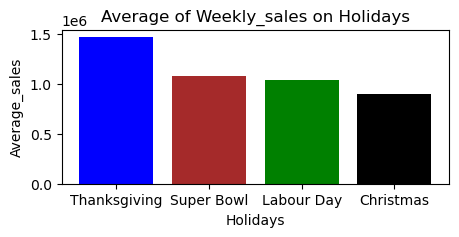

In [42]:
plt.figure(figsize=(5,2))
plt.bar(grouped_h_df['Holidays'], grouped_h_df["Weekly_Sales"], color=['blue','brown','green','black'])
plt.xlabel('Holidays')
plt.ylabel('Average_sales')
plt.title('Average of Weekly_sales on Holidays')
plt.show()

* It was observed that the Thanksgiving Holidays has the hightest sales of <code>1,471,273 USD</code> on an average, that is to say that the walmat stores makes alot of sales during the Thanksgiving holiday period

* We cans still drill down to know the count of sales in the different Holidays across the dataset

In [43]:
holiday_df.groupby('Holidays')['Weekly_Sales'].count().reset_index().sort_values(by='Weekly_Sales', ascending=False)

,Holidays,Weekly_Sales
1,Labour Day,135
2,Super Bowl,135
3,Thanksgiving,90
0,Christmas,45


* From the above, we can ascertain that even though the Than Thanksgiving Holiday has the highest sales, but the Labour Day and Super Bowl Holiday has the highest sales count of 135 each.
<br>

This could be caused by various reasons and factor, it might likely be because of the CPI, or Fuel Price, we can find that

#### 4. Does the Temperature and fuel cost has any effect on the week sales</b>

* We can achieve this using a correlation matric.
* Plotting a heatmap
* Even plot a scatter plot with a trendline

In [44]:
df_corr = df[['Weekly_Sales','Temperature','Fuel_Price']]

In [45]:
corr_mat = df_corr.corr()
corr_mat

,Weekly_Sales,Temperature,Fuel_Price
Weekly_Sales,1.000000,-0.063810,0.009464
Temperature,-0.063810,1.000000,0.144982
Fuel_Price,0.009464,0.144982,1.000000


Text(0.5, 1.0, 'Correlation Matric')

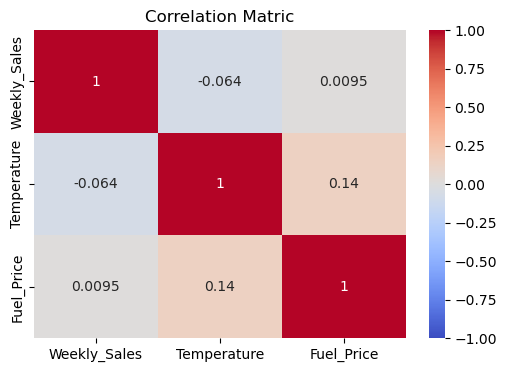

In [46]:
#plotting the correlation matrics on the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matric')

No correlation between the Temperature, Fuel Price and the Weekly Sales
the Temperation and the Weekly_Sales has -0.064 correlation value, while the Fuel Price and the Weekly Sales has 0.0095 correlation value, which is insignificant

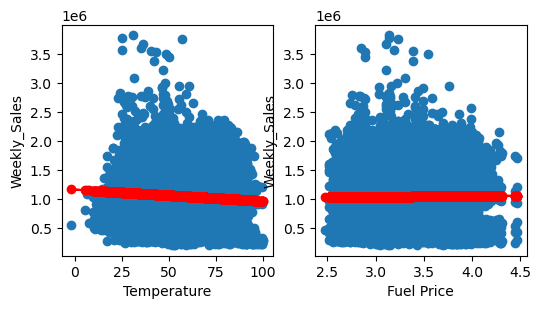

In [47]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
#adding a trendline
z = np.polyfit(df['Temperature'], df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Temperature'], p(df['Temperature']), "r-o")

plt.subplot(1,2,2)
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'])
plt.xlabel('Fuel Price')
plt.ylabel('Weekly_Sales')
#adding a trendline
z = np.polyfit(df['Fuel_Price'], df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Fuel_Price'], p(df['Fuel_Price']), "r-o")


* From the above, we can conclude that cost of fuel and Temperature has to effect on the Weekly Sales value, no correlation
<br>

* We can still do more as regards the temperature, we can still determine the particular temperature scale that has much or lesser sales count in the dataset.

#### 5. What is the relationship between the prevailing unemployment rate and the weekly sales</b>

In [48]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Date', 'Weekday', 'Weekday_No', 'Month',
       'Month_No', 'Year'],
      dtype='object')

In [51]:
# Now lets check for the correlation value between the unemployment rate and weekly_sales
unem_ = df[['Unemployment','Weekly_Sales']]
unem_Sales_corr = unem_.corr()
unem_Sales_corr

,Unemployment,Weekly_Sales
Unemployment,1.000000,-0.106176
Weekly_Sales,-0.106176,1.000000


Text(0.5, 1.0, 'Correlation Matric')

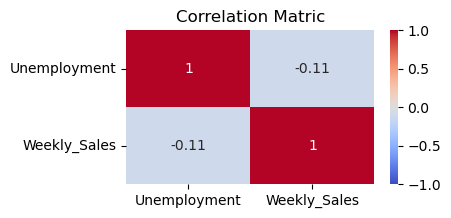

In [53]:
#plotting the correlation Matric
plt.figure(figsize=(4,2))
sns.heatmap(unem_Sales_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matric')

* From the correlation matric, we noticed that there is a linear correlation between the unemployment rate and the weekly sales, even though its a week negative correlation

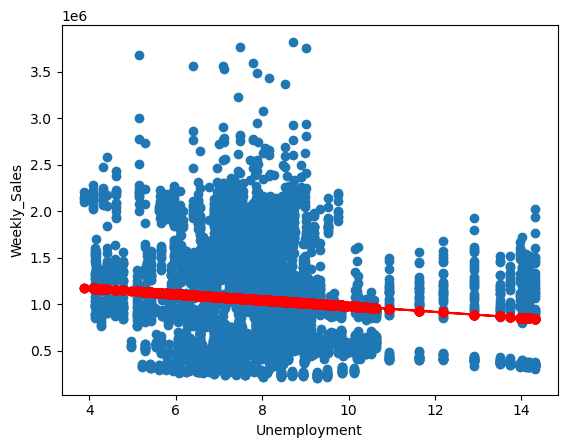

In [56]:
#Now lets plot on the scatter plot for more visualisation
#plt.figure(figsize=(8,6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
#adding a trendline
z = np.polyfit(df['Unemployment'], df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Unemployment'], p(df['Unemployment']), "r-o")

* so we can say that the unemployment rate in a particular region can affect the weekly sales in a particular store even though its significance is not much i.e -0.11 correlation value with is very week negative correlation

#### 6. Check if the CPI on the store increases or decreases by time across the dataset and among the different stores</b>

In [58]:
# extracting just the store, CPI and the date from the dataset

df_trend = df[['Store','Date','CPI']]
df_trend.head(2)

,Store,Date,CPI
0,1,2010-02-05,211.096358
1,1,2010-02-12,211.242170


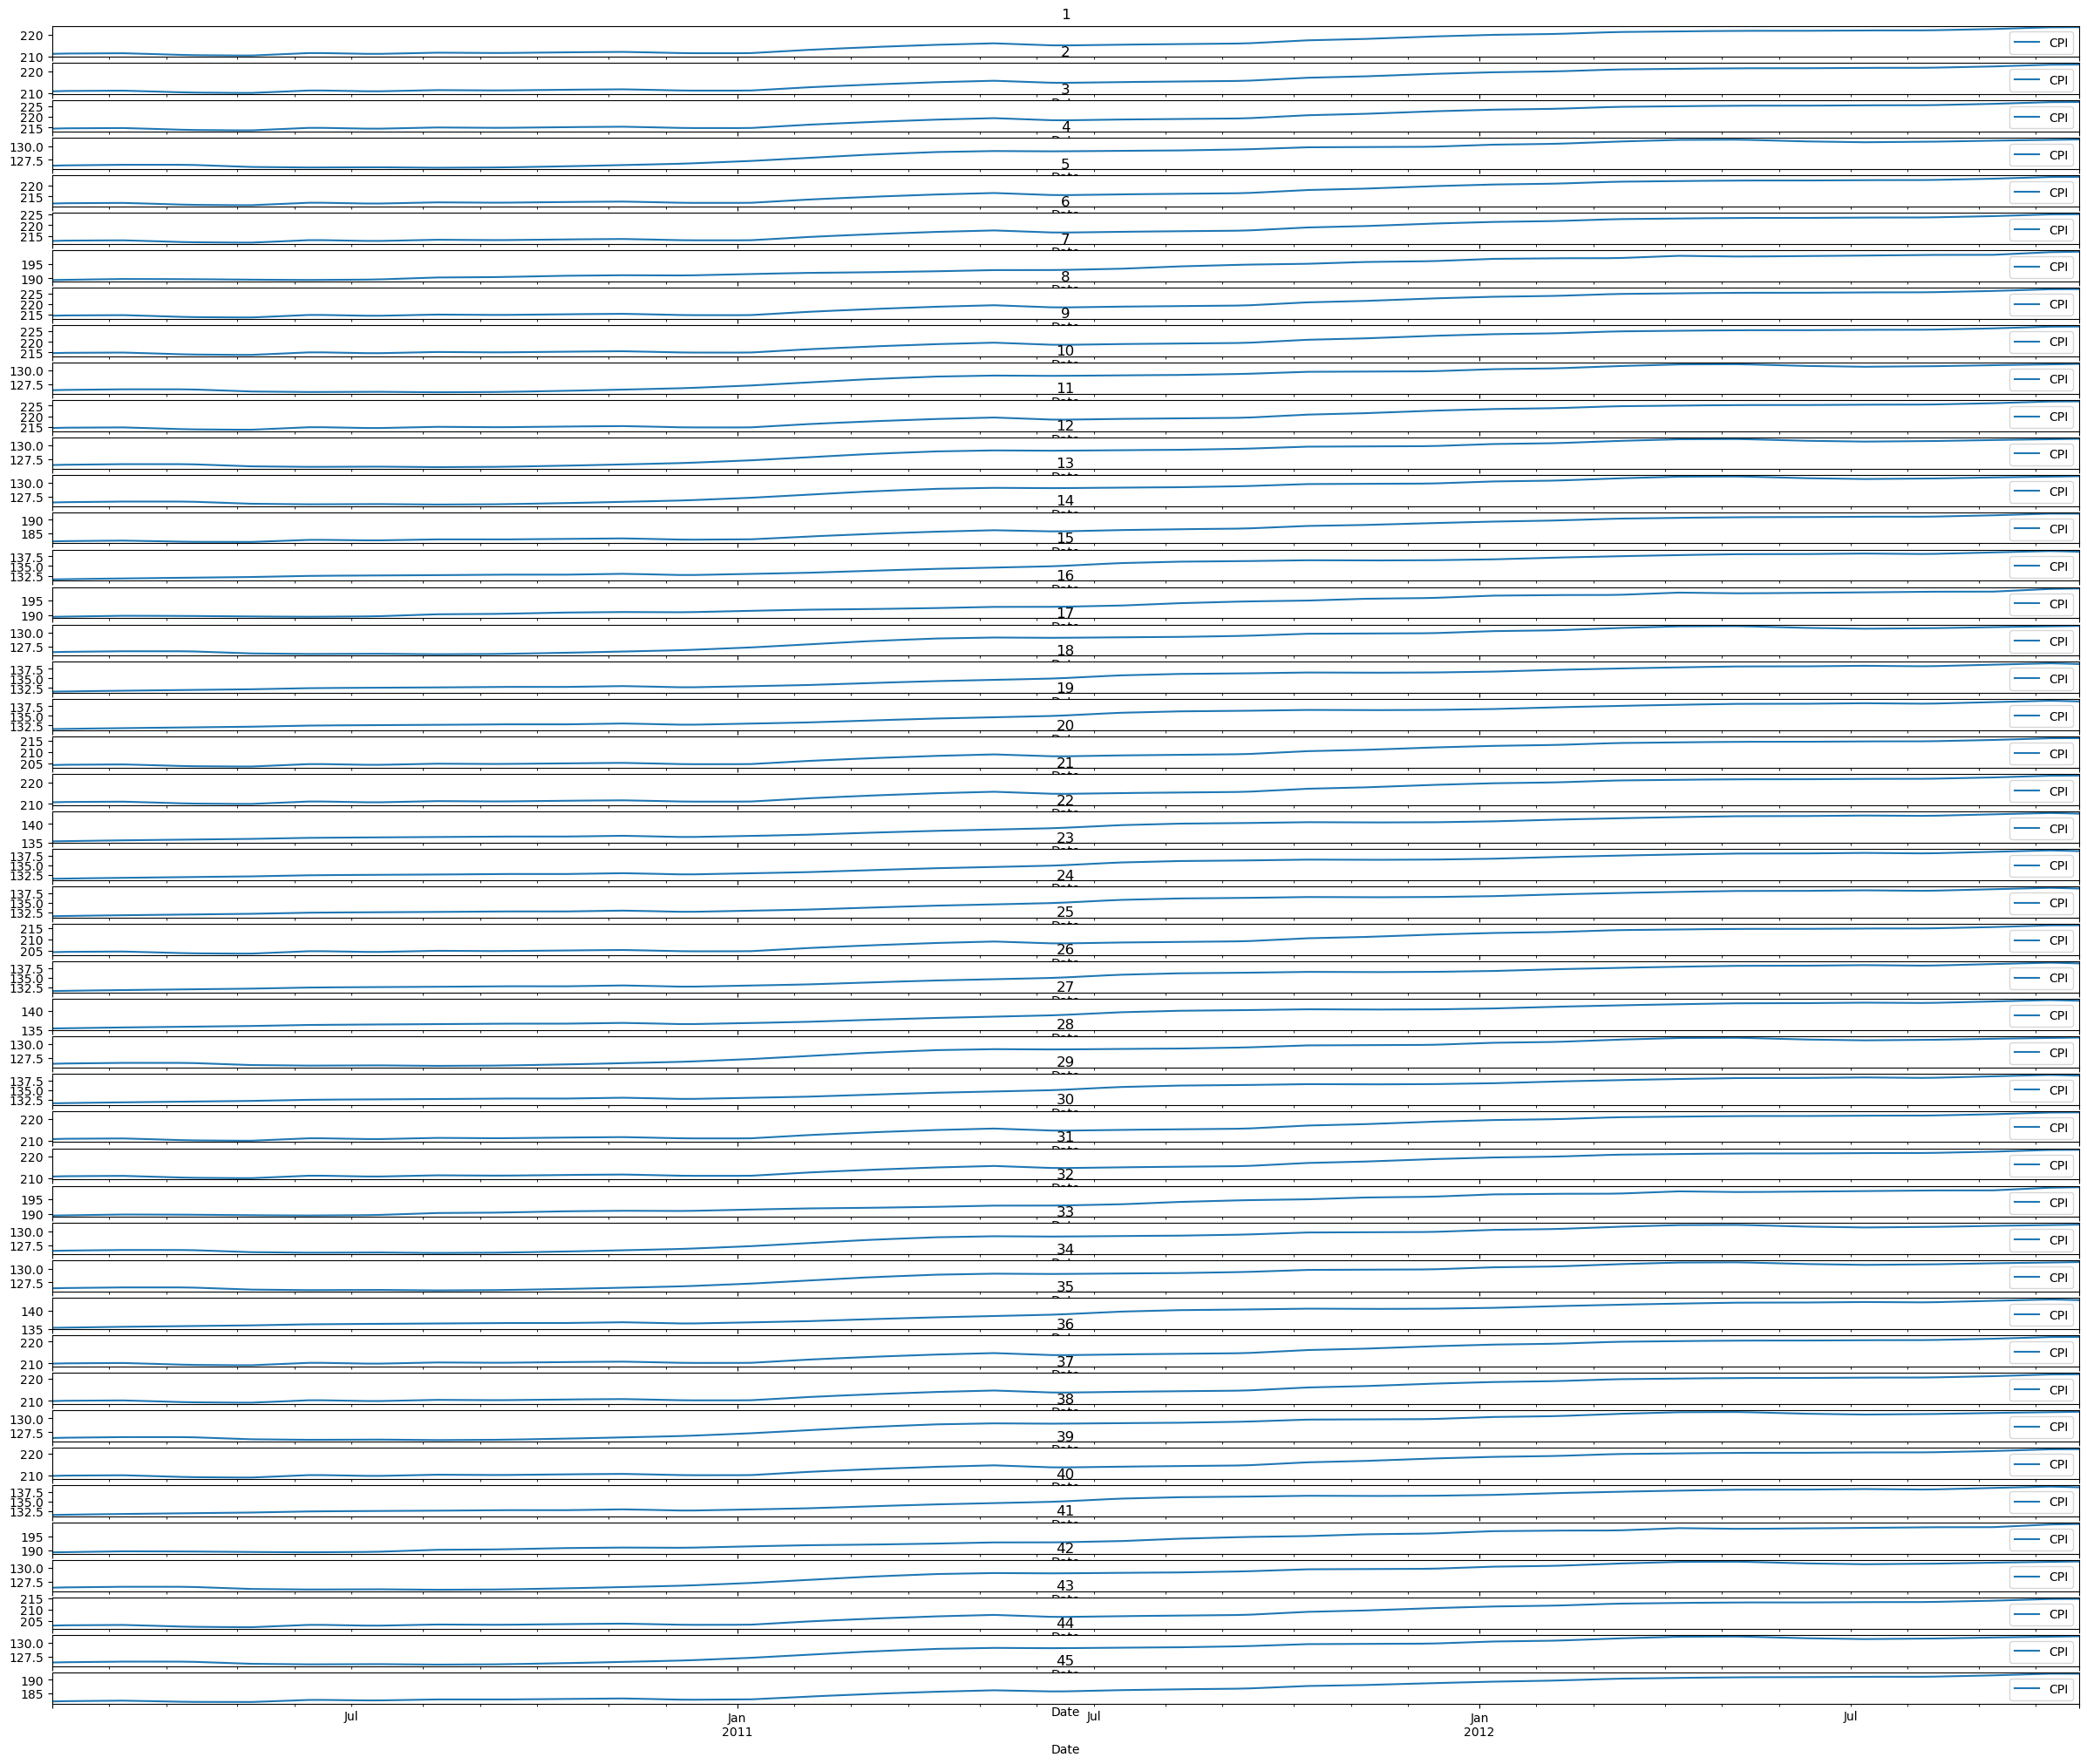

In [79]:
#fig, axs = plt.subplots(nrows=len(df_trend['Store'].unique()), figsize=(12, 20))

num_stores = 45
num_of_rows = 45
num_of_cols = math.ceil(num_stores/num_of_rows)

fig, axs = plt.subplots(nrows=num_of_rows,figsize=(30, 25))

for i, store in enumerate(df_trend['Store'].unique()):
    ax = axs[i]
    df_trend[df_trend['Store'] == store].plot(x='Date', y='CPI', ax=ax, title=store)
plt.show()




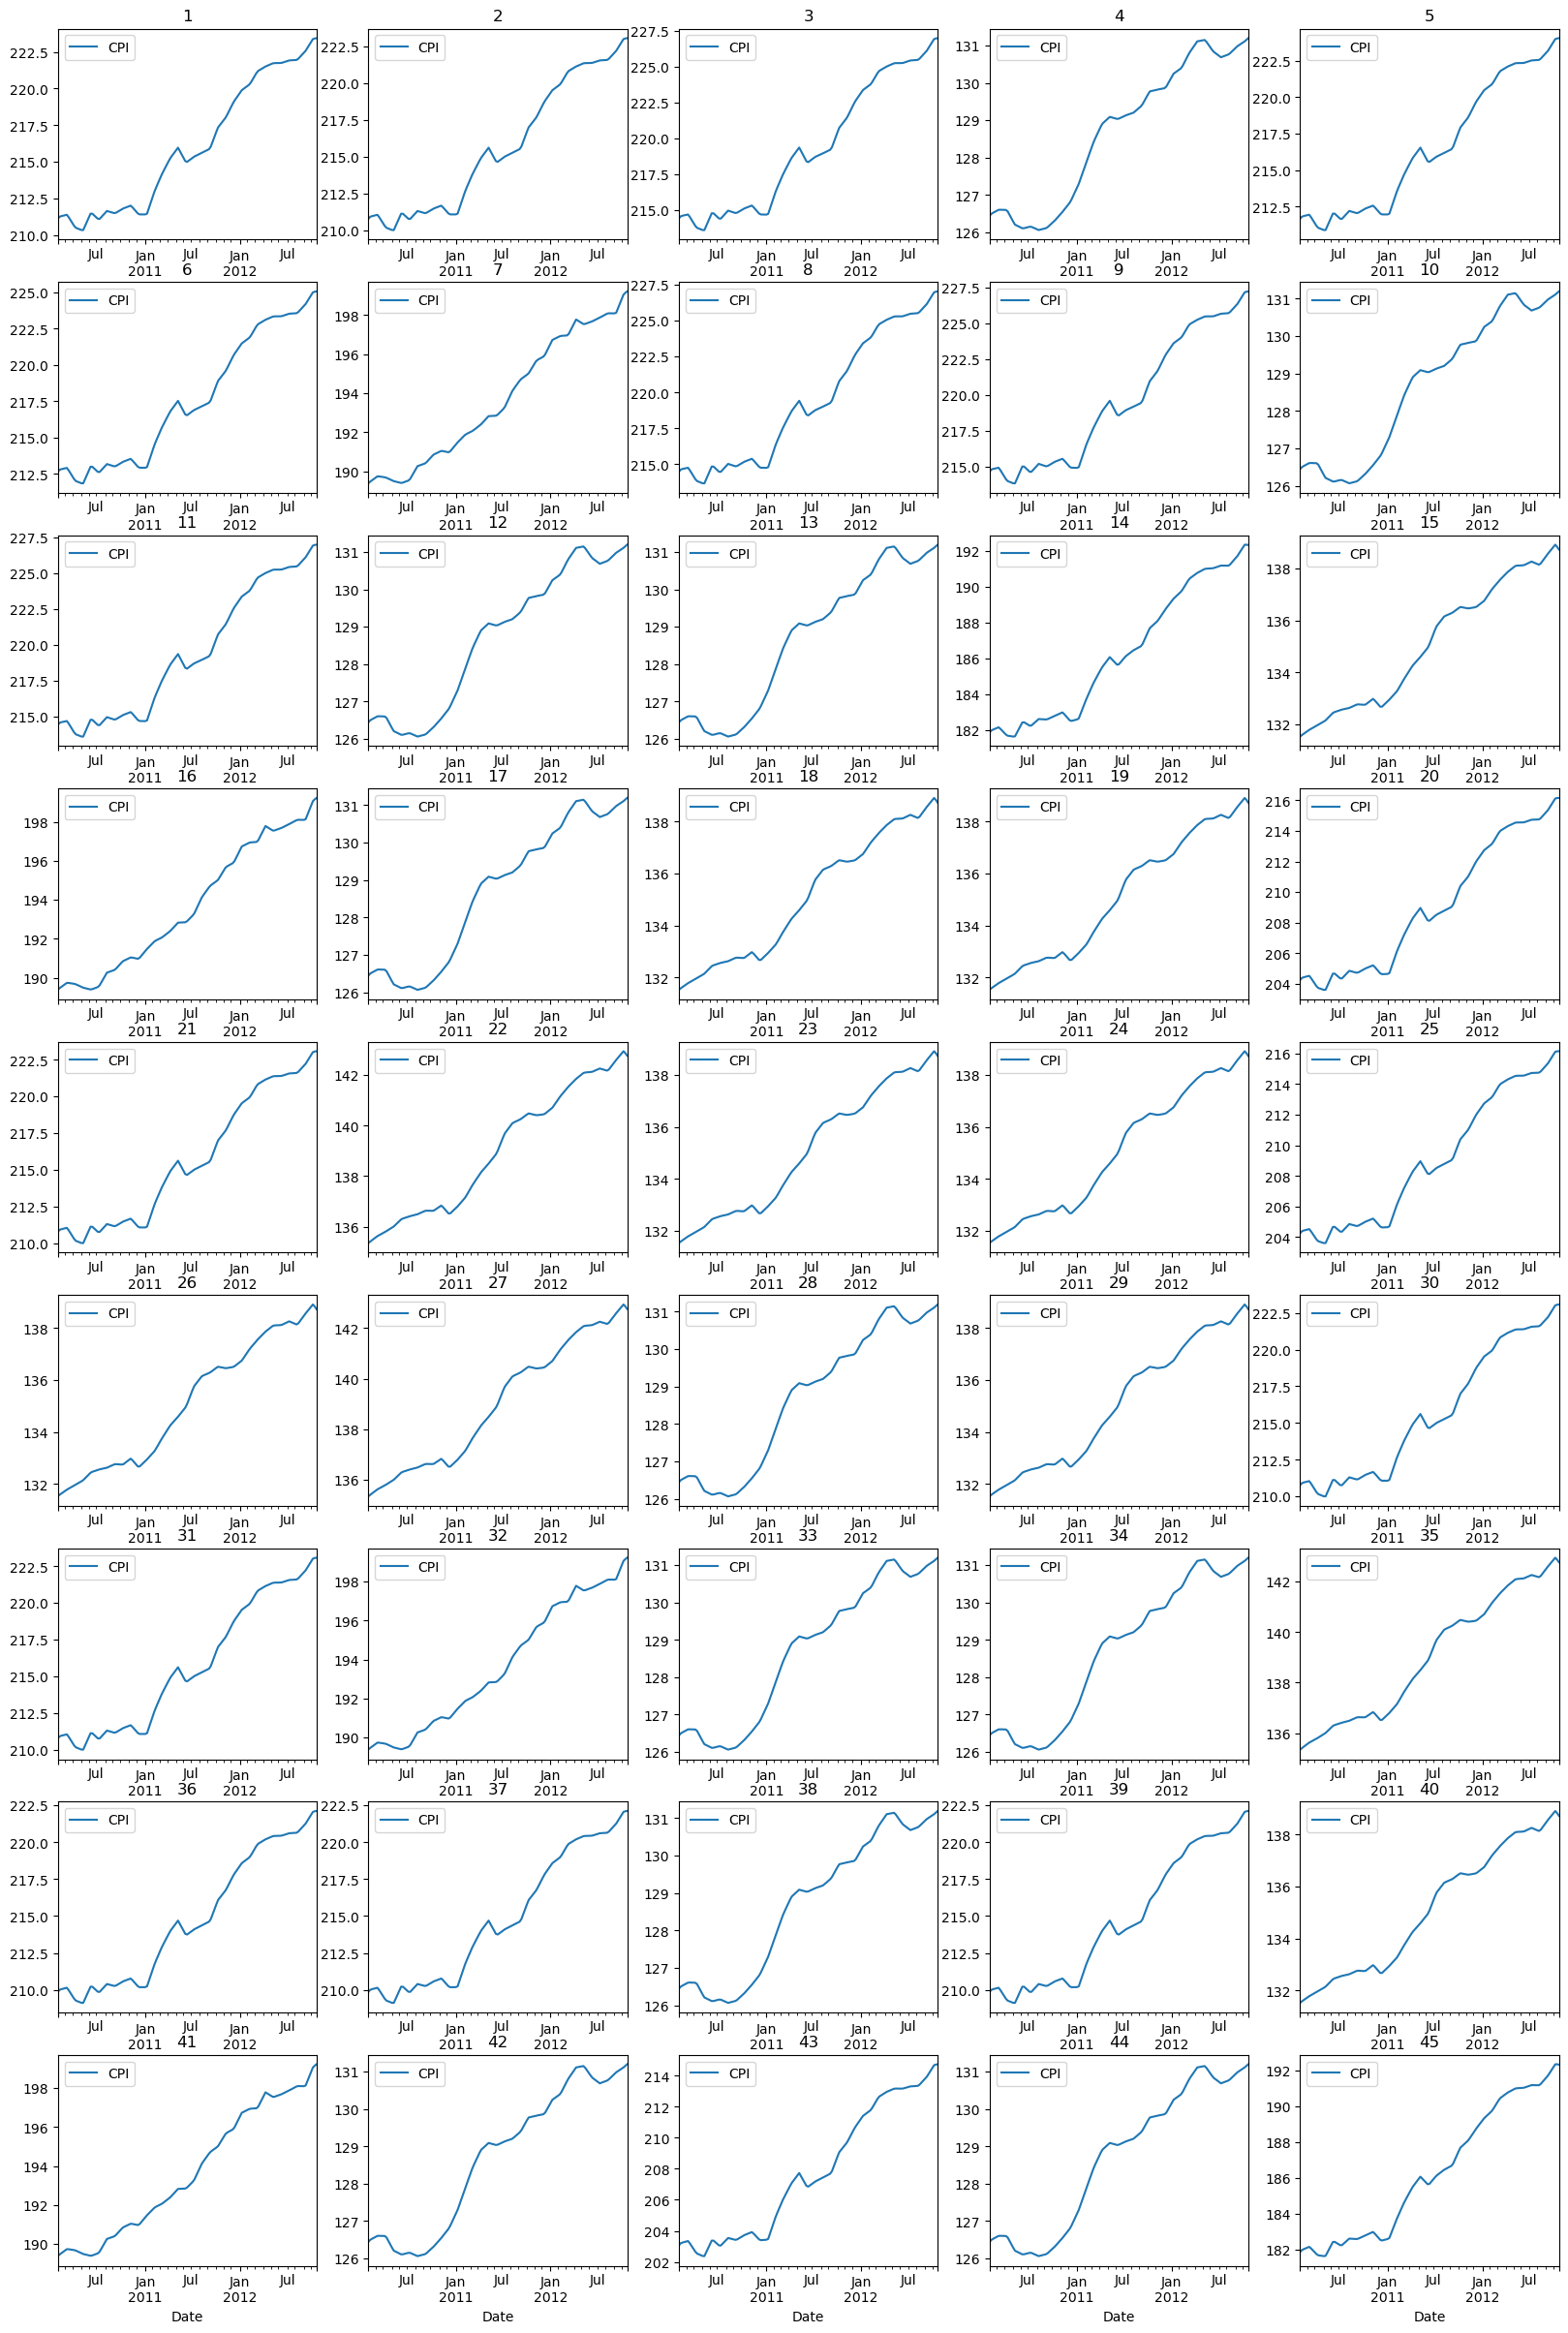

In [88]:
num_stores = 45
num_of_rows = 10
num_of_cols = math.ceil(num_stores/num_of_rows)

fig, axs = plt.subplots(nrows=9, ncols=5, figsize=(20, 30))

for i, store in enumerate(df_trend['Store'].unique()):
    ax = axs[i // 5 , i % 5] if i < 45 else None
    if ax:
        df_trend[df_trend['Store'] == store].plot(x='Date', y='CPI', ax=ax, title=store)


* it seems like there is an upward trend in the CPI value, i.e to say at weekly interval and increase in Month and Year, the price of commodities increase in the various stores, could this have effect on the Weekly_Sales ? Lets check and find out

#### 7. Check if the Relationship between the CPI and the Weekly Sales</b>

In [89]:
# Now lets check for the correlation value between the unemployment rate and weekly_sales
CPI_ = df[['CPI','Weekly_Sales']]
CPI_Sales_corr = CPI_.corr()
CPI_Sales_corr

,CPI,Weekly_Sales
CPI,1.000000,-0.072634
Weekly_Sales,-0.072634,1.000000


Text(0.5, 1.0, 'Correlation Matric')

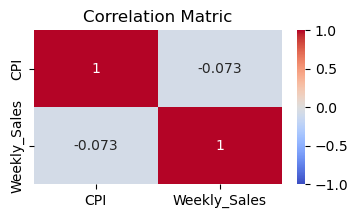

In [90]:
#plotting the correlation Matric
plt.figure(figsize=(4,2))
sns.heatmap(CPI_Sales_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matric')

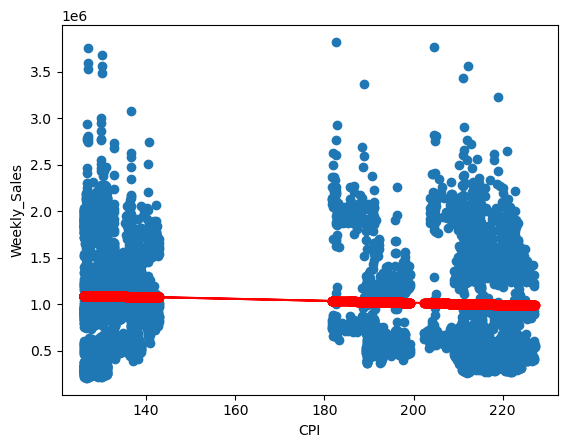

In [113]:
#Now lets plot on the scatter plot for more visualisation
#plt.figure(figsize=(8,6))
plt.scatter(df['CPI'], df['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
#adding a trendline
z = np.polyfit(df['CPI'], df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(df['CPI'], p(df['CPI']), "r-o")

* From the above, it was finally observed that despite the upward trend in the CPI values, it has little or no linear relationship on the weekly sales, even thou we are having a clustered chart where certain value of CPI has a particular sales but very week linear relationship or no relationship.

## General Insight from the Analysis

Below are the general insights gotten from the 
  1. The dataset contains 6435 rows and 8 columns
  2. The Unemployment and Temperature columns might contain some outliers
  3. The dataset contains 2 categorical columns and 5 numeric columns and 1 object (date)
  4. We have 45 walmat stores
  5. The dataset has no null value
  6. The dataset does not have any duplicates
  7. Almost all of the dataset are float64 numbers, just two int64 and one object which is the date
  8. year 2010, 2011 and 2012 has total sales count of 2160, 2340 and 1935 respectively
  9. year 2010 has the Highest weekly_sales of 1,059,670 USD in the dataset
  10. December has the highest Average Weekly_sales of 1,281,864 USD across the dataset
  11. store 20 has the Highest Average Weekly_Sales of 2,107,677 USD
  12. store 14 has the highest Average sales of 2,197,130 USD  in the year 2010 across the dataset
  13. store 33 has the list Average sales of 2,491,892 USD in 2011
  14. it was observered that over 25 stores made their highest sales in year 2010
  15. It was observed that During the Holiday sales, on an average, the stores made the best sales than normal days, Holidays sales is 1,122,888 USD while non Holidays sales is 1,041,256 USD
  16. We also observed that the Thanksgiving Holidays has the hightest sales of 1,471,273 USD on an average, that is to say that the walmat stores makes alot of sales during the Thanksgiving holiday period
  17. From the analysis, we can ascertain that even though the Thanksgiving Holiday has the highest sales, but the Labour Day and Super Bowl Holiday has the highest sales count of 135 each.
  18. There is no correlation between the Temperature, Fuel Price and the Weekly Sales the Temperation and the Weekly_Sales has -0.064 correlation value, while the Fuel Price and the Weekly Sales has 0.0095 correlation value, which is insignificant
  19. From the analysis, we can conclude that cost of fuel and Temperature has no effect on the Weekly Sales value, no correlation
  20. so we can say that the unemployment rate in a particular region can affect the weekly sales in a particular store even though its significance is not much i.e -0.11 correlation value which is a very week negative correlation
  21. From the analysis, we noticed that there is an upward trend in the CPI value, i.e to say at weekly interval and increase in Month and Year, the price of commodities increase in the various stores
  22. Extending No. 21 insight, it was finally observed that despite the upward trend in the CPI values, it has little or no linear relationship on the weekly sales, even thou we are having a clustered chart where certain value of CPI has a particular sales but very week linear relationship or no relationship.